In [2]:
import quandl
QUANDL_API_KEY = 'JxJzaPDfqX-xftmzxfrz'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [3]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [4]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2019-09-02,16.125,16.180,16.010,16.010,889584.0,14300387.0
2019-09-03,16.000,16.020,15.780,15.875,1500316.0,23841925.0
2019-09-04,16.100,16.155,16.005,16.080,1469570.0,23641257.0
2019-09-05,16.170,16.585,16.135,16.585,2509805.0,41308074.0
2019-09-06,16.600,16.685,16.445,16.605,1984564.0,32880430.0


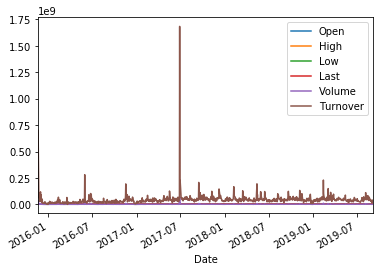

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot();

### Plotting a price and volume chart

In [6]:
prices = df['Last']
volumes = df['Volume']

In [7]:
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [8]:
volumes.tail()

Date
2019-09-02     889584.0
2019-09-03    1500316.0
2019-09-04    1469570.0
2019-09-05    2509805.0
2019-09-06    1984564.0
Name: Volume, dtype: float64

In [9]:
type(volumes)
type(prices)

pandas.core.series.Series

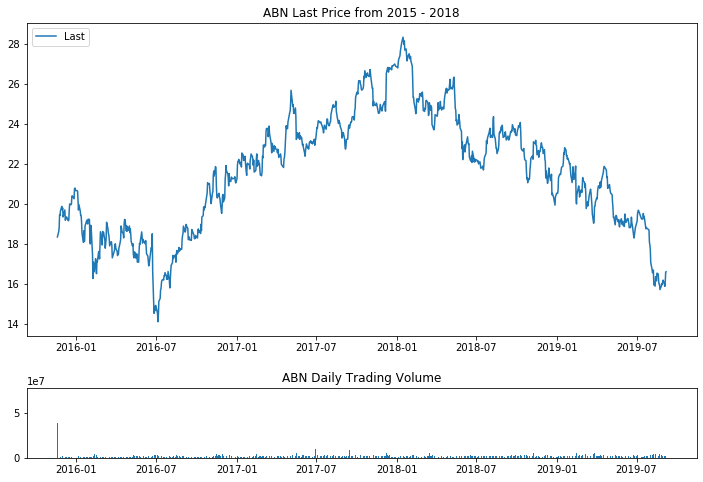

In [10]:
# The top plot consisting of daily closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)
# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')
plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

### Plotting a candlestick chart

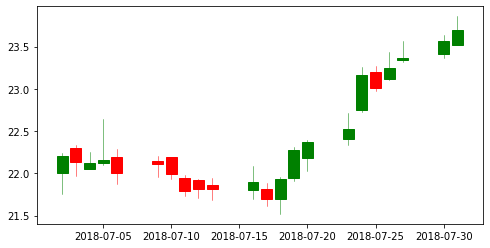

In [11]:
%matplotlib inline
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#You can specify the start_date and end_date parameters in the quandl.get() command to 
#retrieve the dataset for the selected date range.

quandl.ApiConfig.api_key = QUANDL_API_KEY
df_subset = quandl.get('EURONEXT/ABN',start_date='2018-07-01',end_date='2018-07-31')
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]
figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup='green', colordown='red')

plt.show()

## Performing financial analytics on time series data

### Plotting returns

One of the classic measures of security performance is its returns over a prior period. A
simple method for calculating returns in pandas is pct_change, where the percentage
change from the previous row is computed for every row in the DataFrame.

#### A line plot of daily percentage returns is shown as follows:

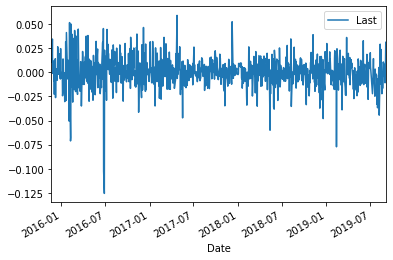

In [12]:
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

### Plotting cumulative returns

This gives us the following output graph:

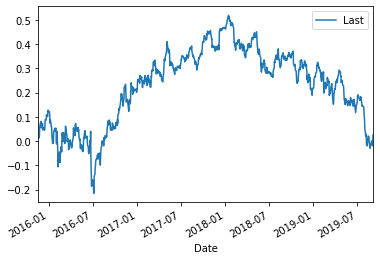

In [13]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

## Plotting a histogram

Histograms tell us how distributed data is. In this example, we are interested in how
distributed the daily returns of ABN are. We use the hist() method on a DataFrame with
a bin size of 50:

The histogram output is shown as follows:

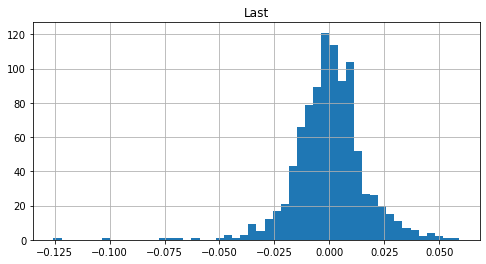

In [14]:
daily_changes.hist(bins=50, figsize=(8, 4));

We can use the describe() method to summarize the central tendency, dispersion, and
shape of a dataset's distribution:

In [15]:
daily_changes.describe()

,Last
count,961.000000
mean,0.000028
std,0.016147
min,-0.125527
25%,-0.008602
50%,0.000274
75%,0.008689
max,0.059123


### Plotting volatility

One way of analyzing the distribution of returns is measuring its standard deviation.
Standard deviation is a measure of dispersion around the mean. A high standard deviation
value for past returns indicates a high historical volatility of stock price movement.
The rolling() method of pandas helps us to visualize specific time series operations over
a period of time. To calculate standard deviations of the percentage change of returns in
our computed ABN dataset, we use the std() method, which returns a DataFrame or
Series object that can be used to plot a chart.

The following is volatility plot:

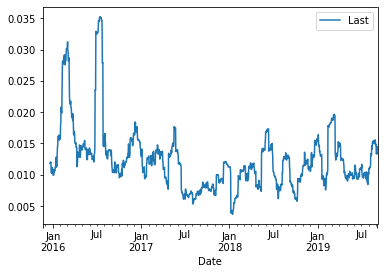

In [16]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

Our original time series datasets exclude weekends and public holidays, which must be
taken into account when using the rolling() method. The df.asfreq() command will
re-index time series data on a daily frequency, creating new indexes in place of missing
ones. The method parameter with a value of ffill specifies that we will propagate the last
valid observation forward in place of missing values during re-indexing.

In the rolling() command, we specified the window parameter with a value of 30, which
is the number of observations used for calculating the statistic. In other words, the standard
deviation of each period is calculated with a sample size of 30. Since the first 30 rows do not
have a sample size that is enough to calculate the standard deviation, we can exclude these
rows by specifying min_periods as 30.

The chosen value of 30 approximates the monthly standard deviation of returns. Note that
choosing wider window periods represents less of the data being measured.

### A quantile-quantile plot

A Q-Q (quantile-quantile) plot is a probability distribution plot, where the quantiles of two distributions are plotted against each other. If the distributions are linearly related, the points in the Q-Q plot will lie along a line. Compared to histograms, Q-Q plots help us to visualize points that lie outside the line for positive and negative skews, as well as excess kurtosis.

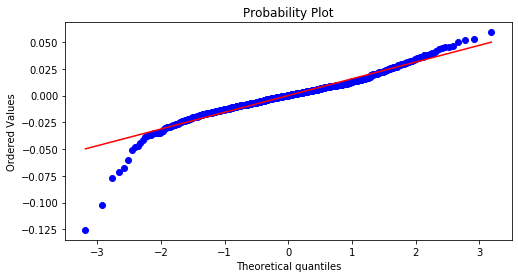

In [17]:
%matplotlib inline
import quandl
from scipy import stats
from scipy.stats import probplot
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()
figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plt.show();

When all points fall exactly along the red line, the distribution of data implies perfect
correspondences to a normal distribution. Most of our data is close to being perfectly
correlated between quantiles -2 and +2. Outside this range, there begin to be differences in
correlation of the distribution, with more negative skews at the tails.

## Downloading multiple time series data

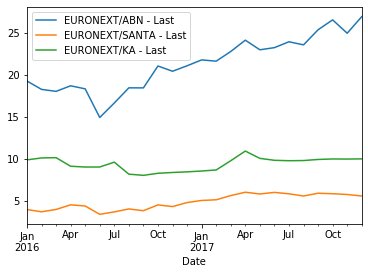

In [18]:
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4','EURONEXT/SANTA.4','EURONEXT/KA.4'],
                collapse='monthly', start_date='2016-01-01', end_date='2017-12-31')
df.plot();

By default, quandl.get() returns daily prices. We may also specify other 
types of frequency for the dataset to download. In this example, we
specified collapse='monthly' to download monthly prices.

## Displaying the correlation matrix

Correlation is a statistical association of how closely two variables have a linear relationship with each other. We can perform a correlation calculation on the returns of two time series datasets to give us a value between -1 and 1. A correlation value of 0 indicates that the returns of the two time series have no relation to each other. A high correlation value close to 1 indicates that the returns of the two time series data tend to move together. A low value close to -1 indicates that returns tend to move inversely in relation to each other.

In [23]:
df.pct_change().corr(method='pearson')

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


By default, the corr() command uses the Pearson correlation coefficient to
compute pairwise correlations. This is equivalent to calling corr(method='pearson').
Other valid values are kendall and spearman for the Kendall Tau and Spearman rank
correlation coefficients, respectively.

In [20]:
df.pct_change().corr(method='kendall')

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.517787,0.193676
EURONEXT/SANTA - Last,0.517787,1.000000,0.201581
EURONEXT/KA - Last,0.193676,0.201581,1.000000


In [21]:
df.pct_change().corr(method='spearman')

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.708498,0.312253
EURONEXT/SANTA - Last,0.708498,1.000000,0.249012
EURONEXT/KA - Last,0.312253,0.249012,1.000000


## Plotting correlations

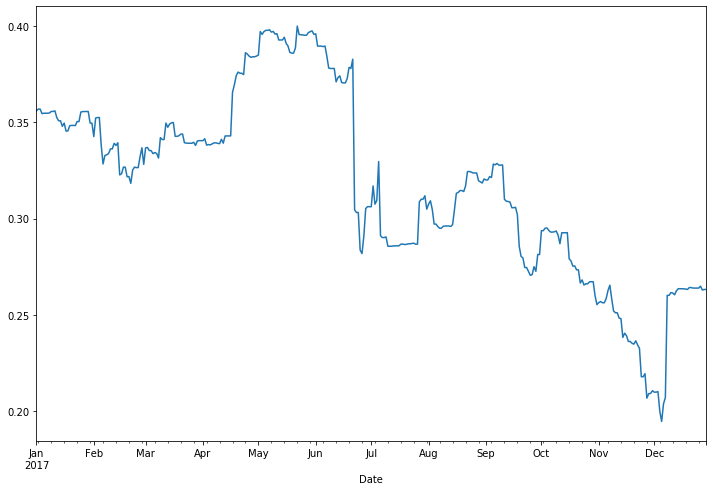

In [31]:
%matplotlib inline
import quandl

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], 
                start_date='2016-01-01', 
                end_date='2017-12-31')

df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)
df_corrs = abn_returns\
.rolling(window=window, min_periods=window)\
.corr(other=santa_returns).dropna()
df_corrs.plot(figsize=(12,8));

## Simple moving averages

A common technical indicator for time series data analysis is moving averages. The mean() method can be used to compute the mean of values for a given window in the rolling() command. For example, a 5-day Simple Moving Average (SMA) is the average of prices for the last five trading days, computed daily over a time period. Similarly, we can also compute a longer term 30-day simple moving average. These two moving averages can be used together to generate crossover signals.

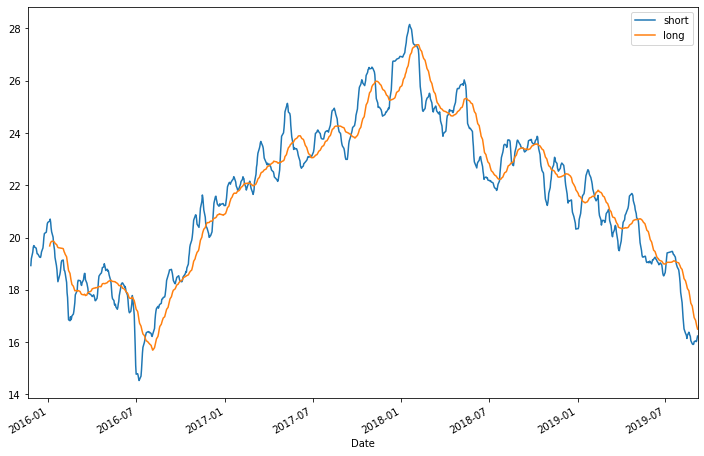

In [32]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));

We use a 5-day average for the short-term SMA and 30 days for a long-term SMA. The min_periods parameter is supplied to exclude the first rows that do not have sufficient sample size for computing the SMA. The df_sma variable is a newly-created pandas DataFrame for storing SMA computations. We then plot a 12-inch-by-8-inch graph. From the graph, we can see a number of points where the short-term SMA intercepts the longterm SMA. Chartists use crossovers to identify trends and generate signals. The window periods of 5 and 10 are purely suggested values; you might tweak these values to find a suitable interpretation of your own.

## Exponential moving averages

Another approach in the calculation of moving averages is the Exponential Moving Average (EMA). Recall that the simple moving average assigns equal weight to prices within a window period. However, in EMA, the most recent prices are assigned a higher weight than older prices. This weight is assigned on an exponential basis.

The ewm() method of the pandas DataFrame provides exponential weighted functions. The span parameter specifies the window period for the decay behavior.

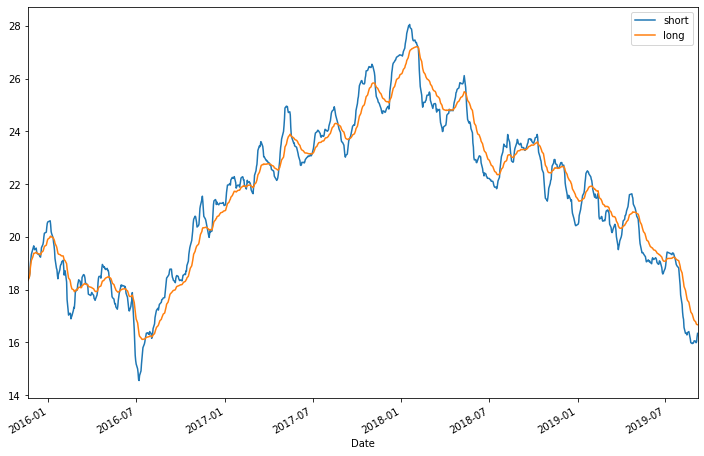

In [34]:
%matplotlib inline
import quandl
import pandas as pd

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));